In [1]:
# import required libraries to munge data
import pandas as pd
import numpy as np
import os
import scipy
from math import log

In [19]:
from datetime import datetime
from datetime import timedelta

In [2]:
# import matplotlib to draw plot inside of notebook
%matplotlib inline
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

import matplotlib
import matplotlib.transforms as transforms

# set global font size
font = {'size'   : 20}
matplotlib.rc('font', **font)

In [3]:
i = 1 # for testing
coarse_random_file = "../../log/C_random200e0.1F_e20_" + str(i) + ".csv"
coarse_sobol_file = "../../log/C_sobol200e0.1F_e20_" + str(i) + ".csv"
random_table = pd.read_csv(coarse_random_file, header=0)
sobol_table = pd.read_csv(coarse_sobol_file, header=0)

In [4]:
def get_coarse_opt_time(table, coarse_epoch):
    total_only_table = table[table["Measure Type"] == 'total']
    coarse_table = total_only_table[total_only_table["Epoch"] == coarse_epoch]
    return sum(coarse_table["Elapsed Time"]) # total elapsed time for coarse optimization

In [5]:
random_coarse_time = get_coarse_opt_time(random_table, 0.1)
random_sobol_time = get_coarse_opt_time(sobol_table, 0.1)

In [6]:
def get_fine_total_table(table, fine_epoch):
    total_only_table = table[table["Measure Type"] == 'total']
    fine_table = total_only_table[total_only_table["Epoch"] == fine_epoch]
    return fine_table

In [7]:
random_fine_table = get_fine_total_table(random_table, 20)
print (len(random_fine_table))

40


In [8]:
sobol_fine_table = get_fine_total_table(sobol_table, 20)
print (len(sobol_fine_table))

40


In [9]:
spearmint_id = 2593

In [10]:
def get_data(table):
    coarse_epoch = 0.1
    fine_epoch = 20
    train_times = []
    log_test_errors = []
    log_best_errors = []
    test_errors = []
    best_errors = []
    coarse_time = get_coarse_opt_time(table, coarse_epoch) / 60  # per minutes
    coarse_test_error = 1.0 # set default error
    train_times.append(coarse_time)
    test_errors.append(coarse_test_error)
    log_test_errors.append(log(coarse_test_error, 10))
    log_best_errors.append(log(coarse_test_error, 10))
    best_errors.append(coarse_test_error)
    
    fine_table = get_fine_total_table(table, fine_epoch)    
    sorted_fine_table = fine_table.sort_values(["Setting"]) # sort by Setting
    
    best_test_error = 1.0    
    for test_error in sorted_fine_table["Test Error"]:
        # update best test error if test error is smaller than best test error
        if (best_test_error > test_error):
            best_test_error = test_error
           
        log_test_errors.append(log(test_error, 10))
        test_errors.append(test_error) 
        
        log_best_errors.append(log(best_test_error, 10))
        best_errors.append(best_test_error)  
    
    for elapsed_time in sorted_fine_table["Elapsed Time"]: 
        last_time = train_times[-1]
        training_time = last_time + elapsed_time / 60.0
        train_times.append(training_time)
    
    #return [train_times, log_best_errors, log_test_errors]
    return [train_times, best_errors, test_errors]
    #print log_test_errors
    #print train_times
    

In [ ]:
fig = plt.figure(num=None, figsize=(25,17), dpi=100, facecolor='w', edgecolor='k')
for i in [1, 2, 3, 4, 5, 6, 7, 8]:
    subplot = fig.add_subplot(111)
    coarse_random_file = "../../log/C_random200e0.1F_e20_" + str(i) + ".csv"
    coarse_sobol_file = "../../log/C_sobol200e0.1F_e20_" + str(i) + ".csv"
    random_table = pd.read_csv(coarse_random_file, header=0)
    sobol_table = pd.read_csv(coarse_sobol_file, header=0)

    x, y1, y2 = get_data(random_table)
    if i == 1:
        subplot.semilogy(x, y1, color="blue", linestyle='-', marker='o', label="Random")
    else:    
        subplot.semilogy(x, y1, color="blue", linestyle='-', marker='o')
    
    max_x = x[-1]
    x, y1, y2 = get_data(sobol_table)    
    if i == 1:
        subplot.semilogy(x, y1, color="red", linestyle='-', marker='x', label="Sobol")
    else:
        subplot.semilogy(x, y1, color="red", linestyle='-', marker='x')
    subplot.grid(True)
    print y1[-1]
    if x[-1] > max_x:
        max_x = x[-1]
subplot.plot([0, max_x],[0.007, 0.007], color="gray", linestyle='--', label="best")
plt.ylabel("Log(Best Test Error)")    
plt.xlabel("Operation Time (Min.)")
plt.legend(loc="best")
plt.show()

In [ ]:
spearmint_coarse_file = "../../log/CS200-0.1e.csv"
spearmint_table = pd.read_csv(spearmint_coarse_file, header=0)
time = get_coarse_opt_time(spearmint_table, 0.1)
print time

In [21]:
timestamp = "2016-12-07 17:16:44"
datetime_object = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S')
print datetime_object
time_matching_format = '%Y-%m-%d %H:%M:%S'

2016-12-07 17:16:44


In [22]:
datetime_object2 = datetime.strptime(timestamp, time_matching_format)
delta = datetime_object2 - datetime_object
print type(delta)
print (delta + timedelta(seconds=0)) / 60

<type 'datetime.timedelta'>
0:00:00


In [15]:
def get_spearmint_data(table):

    fine_epoch = 20
    train_times = []
    log_test_errors = []
    log_best_errors = []
    test_errors = []
    best_errors = []
    
    fine_table = get_fine_total_table(table, fine_epoch)    
    sorted_fine_table = fine_table.sort_values(["Setting"]) # sort by Setting
    
    best_test_error = 1.0    
    for test_error in sorted_fine_table["Test Error"]:
        # update best test error if test error is smaller than best test error
        if (best_test_error > test_error):
            best_test_error = test_error
           
        log_test_errors.append(log(test_error, 10))
        test_errors.append(test_error) 
        
        log_best_errors.append(log(best_test_error, 10))
        best_errors.append(best_test_error)  
    
    datetime_list = []
    for timestamp in sorted_fine_table["Timestamp"]:
        dt_object = datetime.strptime(timestamp, time_matching_format)
        
        if len(train_times) > 0:
            prev_time = train_times[-1]
        else:
            prev_time = 0
            
        if len(datetime_list) > 0:            
            time_delta = dt_object - datetime_list[-1]
            elapsed_time = time_delta.total_seconds()
        else:
            elapsed_time = 0

        training_time_min = prev_time + elapsed_time / 60        
        train_times.append(training_time_min)
        datetime_list.append(dt_object)
    '''
    for elapsed_time in sorted_fine_table["Elapsed Time"]:
        if len(train_times) > 0:
            last_time = train_times[-1]
        else:
            last_time = 0
        training_time = last_time + elapsed_time / 60.0
        train_times.append(training_time)
    '''
    #return [train_times, log_best_errors, log_test_errors]
    return [train_times, best_errors, test_errors]
    #print log_test_errors
    #print train_times

In [16]:
def get_modified_spearmint_data(table):
    coarse_epoch = 0.1
    fine_epoch = 20
    train_times = []
    log_test_errors = []
    log_best_errors = []
    test_errors = []
    best_errors = []
    total_only_table = table[table["Measure Type"]  == "total"]
    sorted_table = total_only_table.sort_values(["Setting"]) # sort by Setting
    
    best_test_error = 1.0    
    for test_error in sorted_table["Test Error"]:
        # update best test error if test error is smaller than best test error
        if (best_test_error > test_error):
            best_test_error = test_error
           
        log_test_errors.append(log(test_error, 10))
        test_errors.append(test_error) 
        
        log_best_errors.append(log(best_test_error, 10))
        best_errors.append(best_test_error)
    
    datetime_list = []
    for timestamp in sorted_table["Timestamp"]:
        dt_object = datetime.strptime(timestamp, time_matching_format)
        if len(train_times) > 0:
            prev_time = train_times[-1]
        else:
            prev_time = 0
            
        if len(datetime_list) > 0:            
            time_delta = dt_object - datetime_list[-1]
            elapsed_time = time_delta.total_seconds()
        else:
            elapsed_time = 0

        training_time_min = prev_time + elapsed_time / 60        
        train_times.append(training_time_min)
        datetime_list.append(dt_object)
        
    '''
    for elapsed_time in sorted_fine_table["Elapsed Time"]:
        if len(train_times) > 0:
            last_time = train_times[-1]
        else:
            last_time = 0
        training_time = last_time + elapsed_time / 60.0
        train_times.append(training_time)
    '''
    
    #return [train_times, log_best_errors, log_test_errors]
    return [train_times, best_errors, test_errors]
    #print log_test_errors
    #print train_times

In [ ]:
fig = plt.figure(num=None, figsize=(25,17), dpi=100, facecolor='w', edgecolor='k')

subplot = fig.add_subplot(111)
for i in [2593, 3502, 4138]:
    spearmint_only_file = "../../log/spearmint"+ str(i) + "-20e.csv"    
    spearmint_table = pd.read_csv(spearmint_only_file, header=0)
    x, y1, y2 = get_modified_spearmint_data(spearmint_table)
    # subset x, y with time limits
    idx = 0
    time_limit = 4000
    for time in x:
        if time > time_limit:
            break
        else:
            idx += 1
    if i == 4138:
        subplot.semilogy(x[0:idx], y1[0:idx], color="green", linestyle='-', marker='.', label="Spearmint")
    else:
        subplot.semilogy(x[0:idx], y1[0:idx], color="green", linestyle='-', marker='.')
    subplot.grid(True)
    print y1[-1]
spearmint_only_file = "../../log/hpolib-spearmint.es.2.csv"    
spearmint_table = pd.read_csv(spearmint_only_file, header=0)
x, y1, y2 = get_modified_spearmint_data(spearmint_table)
# subset x, y with time limits
idx = 0
time_limit = 4000
for time in x:
    if time > time_limit:
        break
    else:
        idx += 1
if i == 4138:
    subplot.semilogy(x[0:idx], y1[0:idx], color="green", linestyle='-', marker='.', label="Spearmint")
else:
    subplot.semilogy(x[0:idx], y1[0:idx], color="green", linestyle='-', marker='.')
subplot.grid(True)
print y1[-1]
subplot.plot([0, 3500],[0.007, 0.007], color="gray", linestyle='--', label="best")
plt.ylabel("Log(Best Test Error)")    
plt.xlabel("Operation Time (Min.)")
plt.legend(loc="best")
plt.show()

In [ ]:
fig = plt.figure(num=None, figsize=(25,17), dpi=100, facecolor='w', edgecolor='k')
for i in [1, 2, 3, 4, 5, 6, 7, 8]:
    subplot = fig.add_subplot(111)
    coarse_random_file = "../../log/C_random200e0.1F_e20_" + str(i) + ".csv"
    coarse_sobol_file = "../../log/C_sobol200e0.1F_e20_" + str(i) + ".csv"
    random_table = pd.read_csv(coarse_random_file, header=0)
    sobol_table = pd.read_csv(coarse_sobol_file, header=0)

    x, y1, y2 = get_data(random_table)
    #print "number of random tries: " + str(len(y2))
    if i == 1:
        subplot.semilogy(x, y1, color="blue", linestyle='-', marker='o', label="40 nominees by 200 random searchs for 0.1 epoch")
    else:    
        subplot.semilogy(x, y1, color="blue", linestyle='-', marker='o')
    #print y1[-1]
    x, y1, y2 = get_data(sobol_table)
    print str(i) + " - number of sobol tries: " + str(len(y2))
    if i == 1:
        subplot.semilogy(x, y1, color="red", linestyle='-', marker='x', label="40 nominees by 200 Sobol-sequences for 0.1 epoch")
    else:
        subplot.semilogy(x, y1, color="red", linestyle='-', marker='x')
    subplot.grid(True)
    #print y1[-1]
    
for i in [spearmint_id]:
    spearmint_only_file = "../../log/spearmint"+ str(i) + "-20e.csv"    
    spearmint_table = pd.read_csv(spearmint_only_file, header=0)
    x, y1, y2 = get_modified_spearmint_data(spearmint_table)
    # subset x, y with time limits
    idx = 0
    time_limit = 500
    for time in x:
        if time > time_limit:
            break
        else:
            idx += 1
    if i == 4138:
        subplot.semilogy(x[0:idx], y1[0:idx], color="green", linestyle='--', marker='o', label="Bayesian(spearmint)")
    else:
        subplot.semilogy(x[0:idx], y1[0:idx], color="green", linestyle='--', marker='o')
    subplot.grid(True)
    subplot.set_ylim([0.005, 1])
    #print y1[-1]
subplot.plot([0, 500],[0.007, 0.007], color="gray", linestyle='--', label="best")    
plt.ylabel("Log(Test Error)")    
plt.xlabel("Operation Time (Min.)")
plt.legend(loc="best")
plt.show()

In [ ]:
fig.savefig("stage-opt-200-0.1-40.png", format='png', dpi=100, show=False, bbox_inches='tight')

* 400 coarse optimization with 1 epoch and 80 fine optimization with 20 epoch

In [17]:
def merge_data(coarse_epoch, coarse_table, fine_epoch, fine_table):
    train_times = []
    log_test_errors = []
    log_best_errors = []
    test_errors = []
    best_errors = []
    coarse_time = get_coarse_opt_time(coarse_table, coarse_epoch) / 60  # per minutes
    coarse_test_error = 1.0 # set default error
    train_times.append(coarse_time)
    test_errors.append(coarse_test_error)
    log_test_errors.append(log(coarse_test_error, 10))
    log_best_errors.append(log(coarse_test_error, 10))
    best_errors.append(coarse_test_error)
    fine_table = get_fine_total_table(fine_table, fine_epoch)          
    sorted_fine_table = fine_table.sort_values(["Setting"]) # sort by Setting
    
    best_test_error = 1.0    
    for test_error in sorted_fine_table["Test Error"]:
        # update best test error if test error is smaller than best test error
        if (best_test_error > test_error):
            best_test_error = test_error
           
        log_test_errors.append(log(test_error, 10))
        test_errors.append(test_error) 
        
        log_best_errors.append(log(best_test_error, 10))
        best_errors.append(best_test_error)  
    
    for elapsed_time in sorted_fine_table["Elapsed Time"]: 
        last_time = train_times[-1]
        training_time = last_time + elapsed_time / 60.0
        train_times.append(training_time)
    
    #return [train_times, log_best_errors, log_test_errors]
    return [train_times, best_errors, test_errors]
    #print log_test_errors
    #print train_times
    

In [ ]:
fig = plt.figure(num=None, figsize=(25,17), dpi=100, facecolor='w', edgecolor='k')
subplot = fig.add_subplot(111)
coarse_random_file = "../../log/3_CR400-1e.csv"
coarse_table = pd.read_csv(coarse_random_file, header=0)
fine_file = "../../log/3_F80-20e.csv"
fine_table = pd.read_csv(fine_file, header=0)

x, y1, y2 = merge_data(1, coarse_table, 20, fine_table)
subplot.semilogy(x, y1, color="blue", linestyle='-', marker='o', label="80 nominees by 400 random searchs for 1 epoch")
for i in [spearmint_id]:
    spearmint_only_file = "../../log/spearmint"+ str(i) + "-20e.csv"    
    spearmint_table = pd.read_csv(spearmint_only_file, header=0)
    x, y1, y2 = get_modified_spearmint_data(spearmint_table)
    # subset x, y with time limits
    idx = 0
    time_limit = 1000
    for time in x:
        if time > time_limit:
            break
        else:
            idx += 1
    if i == 4138:
        subplot.semilogy(x[0:idx], y1[0:idx], color="green", linestyle='--', marker='o', label="Bayesian(spearmint)")
    else:
        subplot.semilogy(x[0:idx], y1[0:idx], color="green", linestyle='--', marker='o')
    subplot.grid(True)
    subplot.set_ylim([0.005, 1])
subplot.plot([0, 1000],[0.007, 0.007], color="gray", linestyle='--', label="best")
plt.ylabel("Log(Test Error)")    
plt.xlabel("Operation Time (Min.)")
plt.legend(loc="best")
plt.show()

In [ ]:
fig.savefig("stage-opt-random-400-1-80.png", format='png', dpi=100, show=False, bbox_inches='tight')

* 400 coarse optimization (0.1 epoch) -> 80 fine optimization (20 epoch)

In [ ]:
fig = plt.figure(num=None, figsize=(25,17), dpi=100, facecolor='w', edgecolor='k')
subplot = fig.add_subplot(111)

for j in [5, 6, 7]:
    coarse_random_file = "../../log/" + str(j) + "_CR400-0.1e.csv"
    coarse_table = pd.read_csv(coarse_random_file, header=0)
    fine_file = "../../log/" + str(j) + "_F80-20e.csv"
    fine_table = pd.read_csv(fine_file, header=0)
    x, y1, y2 = merge_data(0.1, coarse_table, 20, fine_table)
    if j == 5:
        subplot.semilogy(x, y1, color="blue", linestyle='-', marker='o', label="80 nominees by 400 random searchs for 0.1 epoch")
    else:
        subplot.semilogy(x, y1, color="blue", linestyle='-', marker='o')
    print y1[-1]    
for i in [spearmint_id]:
    spearmint_only_file = "../../log/spearmint"+ str(i) + "-20e.csv"    
    spearmint_table = pd.read_csv(spearmint_only_file, header=0)
    x, y1, y2 = get_modified_spearmint_data(spearmint_table)
    # subset x, y with time limits
    idx = 0
    time_limit = 1000
    for time in x:
        if time > time_limit:
            break
        else:
            idx += 1
    if i == 4138:
        subplot.semilogy(x[0:idx], y1[0:idx], color="green", linestyle='--', marker='o', label="Bayesian(spearmint)")
    else:
        subplot.semilogy(x[0:idx], y1[0:idx], color="green", linestyle='--', marker='o')
    subplot.grid(True)
    subplot.set_ylim([0.005, 1])
    print y1[-1]
subplot.plot([0, 1000],[0.007, 0.007], color="gray", linestyle='--', label="best")
plt.ylabel("Log(Test Error)")    
plt.xlabel("Operation Time (Min.)")
plt.legend(loc="best")
plt.show()

In [ ]:
fig.savefig("stage-opt-random-400-0.1-80.png", format='png', dpi=100, show=False, bbox_inches='tight')

In [ ]:
fig = plt.figure(num=None, figsize=(25,17), dpi=100, facecolor='w', edgecolor='k')
subplot = fig.add_subplot(111)

for j in [1, 2]:
    coarse_random_file = "../../log/" + str(j) + "_CR200-1e.csv"
    coarse_table = pd.read_csv(coarse_random_file, header=0)
    fine_file = "../../log/" + str(j) + "_F40-20e.csv"
    fine_table = pd.read_csv(fine_file, header=0)
    x, y1, y2 = merge_data(1, coarse_table, 20, fine_table)
    if j == 1:
        subplot.semilogy(x, y1, color="blue", linestyle='-', marker='o', label="40 nominees by 200 random searchs for 1 epoch")
    else:
        subplot.semilogy(x, y1, color="blue", linestyle='-', marker='o')
    print y1[-1]    
for i in [spearmint_id]:
    spearmint_only_file = "../../log/spearmint"+ str(i) + "-20e.csv"    
    spearmint_table = pd.read_csv(spearmint_only_file, header=0)
    x, y1, y2 = get_modified_spearmint_data(spearmint_table)
    # subset x, y with time limits
    idx = 0
    time_limit = 1000
    for time in x:
        if time > time_limit:
            break
        else:
            idx += 1
    if i == 4138:
        subplot.semilogy(x[0:idx], y1[0:idx], color="green", linestyle='--', marker='o', label="Bayesian(spearmint)")
    else:
        subplot.semilogy(x[0:idx], y1[0:idx], color="green", linestyle='--', marker='o')
    subplot.grid(True)
    subplot.set_ylim([0.005, 1])
    print y1[-1]
subplot.plot([0, 700],[0.007, 0.007], color="gray", linestyle='--', label="best")
plt.ylabel("Log(Test Error)")    
plt.xlabel("Operation Time (Min.)")
plt.legend(loc="best")
plt.show()

In [ ]:
fig.savefig("stage-opt-random-200-1-40.png", format='png', dpi=100, show=False, bbox_inches='tight')

In [ ]:
fig = plt.figure(num=None, figsize=(25,17), dpi=100, facecolor='w', edgecolor='k')
for i in [1, 2, 3, 4, 5, 6, 7, 8]:
    subplot = fig.add_subplot(111)
    coarse_random_file = "../../log/C_random200e0.1F_e20_" + str(i) + ".csv"
    coarse_sobol_file = "../../log/C_sobol200e0.1F_e20_" + str(i) + ".csv"
    random_table = pd.read_csv(coarse_random_file, header=0)
    sobol_table = pd.read_csv(coarse_sobol_file, header=0)

    x, y1, y2 = get_data(random_table)
    if i == 1:
        subplot.semilogy(x, y1, color="blue", linestyle='-', marker='o', label="40 nominees by 200 random searchs for 0.1 epoch ")
        #subplot.semilogy(x, y2, color="blue", linestyle='', marker='o')
    else:    
        subplot.semilogy(x, y1, color="blue", linestyle='-', marker='o')
        #subplot.semilogy(x, y2, color="blue", linestyle='', marker='o')
    print y1[-1]
    x, y1, y2 = get_data(sobol_table)    
    if i == 1:
        subplot.semilogy(x, y1, color="red", linestyle='-', marker='', label="40 nominees by 200 Sobol sequences for 0.1 epoch")
        #subplot.semilogy(x, y2, color="red", linestyle='', marker='x')
    else:
        subplot.semilogy(x, y1, color="red", linestyle='-', marker='')
        #subplot.semilogy(x, y2, color="red", linestyle='', marker='x')
    subplot.grid(True)
    print y1[-1]
    
for i in [spearmint_id]:
    spearmint_only_file = "../../log/spearmint"+ str(i) + "-20e.csv"    
    spearmint_table = pd.read_csv(spearmint_only_file, header=0)
    x, y1, y2 = get_spearmint_data(spearmint_table)
    # subset x, y with time limits
    idx = 0
    time_limit = 1000
    for time in x:
        if time > time_limit:
            break
        else:
            idx += 1
    if i == 4138:
        subplot.semilogy(x[0:idx], y1[0:idx], color="green", linestyle='--', marker='o', label="Bayesian(spearmint)")
    else:
        subplot.semilogy(x[0:idx], y1[0:idx], color="green", linestyle='--', marker='o')
    subplot.grid(True)
    subplot.set_ylim([0.005, 1])
    print y1[-1]
subplot.plot([0, 700],[0.007, 0.007], color="gray", linestyle='--', label="best")
plt.ylabel("Log(Test Error)")    
plt.xlabel("Operation Time (Min.)")
plt.legend(loc="best")
plt.show()

following shows a result which do not perform good
- cf: coarse - cutoff by 0.5 -fine 
- clf: coarse - cutoff by logistic(min:0.2, max:0.5, iteration) - fine

benchmark algorithm: spearmint (Bayesian optimization with Gaussian Process)


In [ ]:
fig = plt.figure(num=None, figsize=(25,17), dpi=100, facecolor='w', edgecolor='k')
#fig.suptitle("Performance benchmark of modified spearmint (0.1 epoch coarse-optimization and 20 epoch fine optimization only for less than test error 0.5) ", fontsize=20)

subplot = fig.add_subplot(111)

for i in [1, 2]:
    coarse_fine_file = "../../log/" + "hpolib-stage-0.1-20."+ str(i) + ".csv"
    coarse_table = pd.read_csv(coarse_fine_file, header=0)
    x_pos = 200
    y_pos = 0.8

    x, y1, y2 = get_modified_spearmint_data(coarse_table)
    if i == 2:
        subplot.semilogy(x, y1, color="blue", linestyle='-', marker='o', label="csf adapted spearmint")
    else:
        subplot.semilogy(x, y1, color="blue", linestyle='-', marker='o')
        
    subplot.semilogy(x, y2, color="blue", linestyle='', marker='x')
    message = "total tries of csf adapted spearmint: " + str(len(x))
    #subplot.text(x_pos, y_pos, message, fontsize=20, color="blue")
    y_pos = y_pos - 0.1
    print y1[-1]
    
for i in [1, 2, 3, 4]:
    coarse_fine_file = "../../log/" + "hpolib-stage1-0.1-20-" + str(i) + ".csv" 
    coarse_table = pd.read_csv(coarse_fine_file, header=0)
    x, y1, y2 = get_modified_spearmint_data(coarse_table)
    if i == 1:
        subplot.semilogy(x, y1, color="red", linestyle='-', marker='o', label="clf adapted spearmint")
    else:
        subplot.semilogy(x, y1, color="red", linestyle='-', marker='o')
    subplot.semilogy(x, y2, color="red", linestyle='', marker='x')
    message = "total tries of clf adapted spearmint: " + str(len(x))
    #subplot.text(x_pos, y_pos, message, fontsize=20, color="red",)
y_pos = y_pos - 0.1
print y1[-1]
for i in [2593, 3502, 4138]:
    spearmint_only_file = "../../log/spearmint"+ str(i) + "-20e.csv"    
    spearmint_table = pd.read_csv(spearmint_only_file, header=0)
    x, y1, y2 = get_spearmint_data(spearmint_table)
    message = "total tries of original spearmint: " + str(len(x))
    #subplot.text(x_pos, y_pos, message, fontsize=20, color="green")
    y_pos = y_pos - 0.1
    # subset x, y with time limits
    idx = 0
    
    time_limit = 5000
    for time in x:
        if time > time_limit:
            break
        else:
            idx += 1
    if i == 4138:
        subplot.semilogy(x[0:idx], y1[0:idx], color="green", linestyle='--', marker='o', label="original spearmint")
    else:
        subplot.semilogy(x[0:idx], y1[0:idx], color="green", linestyle='--', marker='o')
        subplot.semilogy(x[0:idx], y2[0:idx], color="green", linestyle='', marker='x')
    subplot.grid(True)
    subplot.set_ylim([0.005, 1])
    print y1[-1]
subplot.plot([0, 6000],[0.007, 0.007], color="gray", linestyle='--', label="best")
plt.ylabel("Log(Test Error)")    
plt.xlabel("Operation Time (Min.)")
plt.legend(loc="best")
plt.show()

following shows a result which perform good

0.0139
0.008
0.0074
0.0077
0.0241
0.0208
0.0078
0.0106
0.007


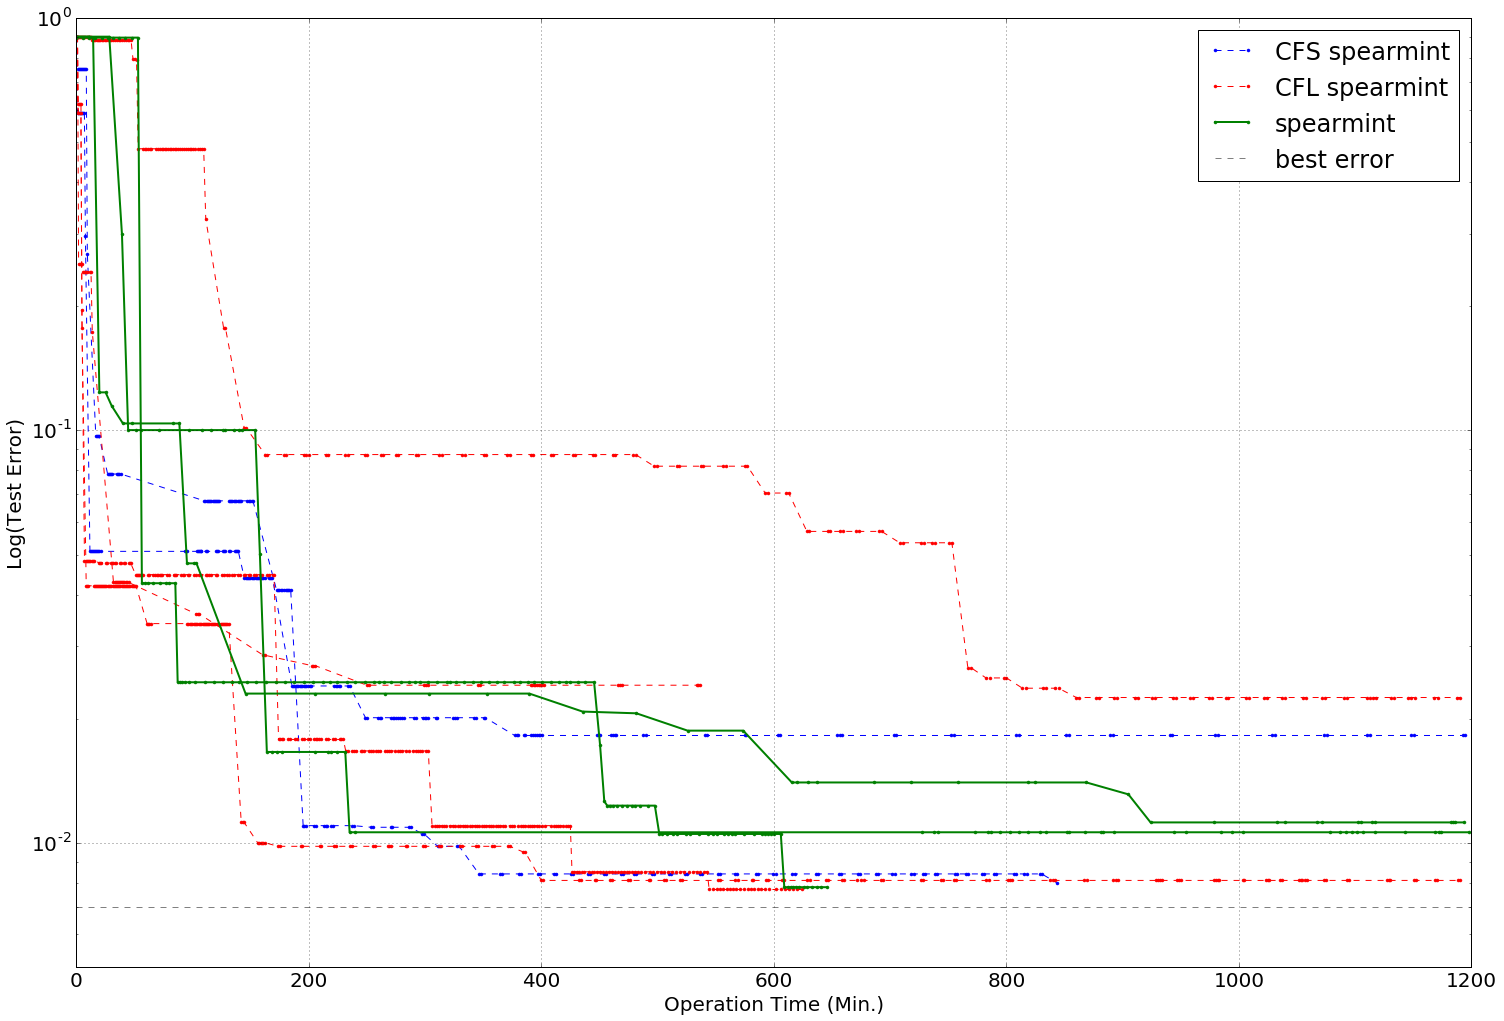

In [47]:
fig = plt.figure(num=None, figsize=(25,17), dpi=100, facecolor='w', edgecolor='k')
#fig.suptitle("Performance benchmark of modified spearmint (0.1 epoch coarse-optimization and 20 epoch fine optimization only for less than test error 0.5) ", fontsize=20)
TIME_LIMIT = 1200
subplot = fig.add_subplot(111)
x_pos = 100
y_pos = 0.7

for k in [1, 2]:
    coarse_fine_file = "../../log/" + "hpolib-stage-0.1-20."+ str(k) + ".csv"
    coarse_table = pd.read_csv(coarse_fine_file, header=0)
    
    x, y1, y2 = get_modified_spearmint_data(coarse_table)

    idx = 0
    for time in x:
        if time > TIME_LIMIT:
            break
        else:
            idx += 1    
    if k == 1:
        subplot.semilogy(x[0:idx], y1[0:idx], color="blue", linestyle='--', marker='.', label="CFS spearmint")
    else:
        subplot.semilogy(x[0:idx], y1[0:idx], color="blue", linestyle='--', marker='.')
    #subplot.semilogy(x[0:idx], y2[0:idx], color="blue", linestyle='', marker='x')
    message = "total tries of cf adapted spearmint: " + str(len(x))
    #subplot.text(x_pos, y_pos, message, fontsize=20, color="blue")
    y_pos = y_pos - 0.1
    print y1[-1]
for j in [1, 2, 3, 4]:
    coarse_fine_file = "../../log/" + "hpolib-stage1-0.1-20-"+ str(j) + ".csv"
    coarse_table = pd.read_csv(coarse_fine_file, header=0)
    x, y1, y2 = get_modified_spearmint_data(coarse_table)
    idx = 0
    for time in x:
        if time > TIME_LIMIT:
            break
        else:
            idx += 1    
    
    if j == 1:
        subplot.semilogy(x[0:idx], y1[0:idx], color="red", linestyle='--', marker='.', label="CFL spearmint")
    else:
        subplot.semilogy(x[0:idx], y1[0:idx], color="red", linestyle='--', marker='.')
    #subplot.semilogy(x, y2, color="red", linestyle='', marker='x')
    message = "total tries of clf adapted spearmint: " + str(len(x))
    #subplot.text(x_pos, y_pos, message, fontsize=20, color="red",)
    y_pos = y_pos - 0.1
    print y1[-1]

for i in [2593, 3502, 4138]:
    spearmint_only_file = "../../log/spearmint"+ str(i) + "-20e.csv" 
    #spearmint_only_file = "../../log/" + "hpolib-spearmint.es.2.csv"
    spearmint_table = pd.read_csv(spearmint_only_file, header=0)
    x, y1, y2 = get_spearmint_data(spearmint_table)
    print y1[-1]
    message = "total tries of original spearmint: " + str(len(x))
    #subplot.text(x_pos, y_pos, message, fontsize=20, color="green")
    y_pos = y_pos - 0.1
    # subset x, y with time limits
    idx = 0
    

    for time in x:
        if time > TIME_LIMIT:
            break
        else:
            idx += 1
    if i == 4138:
        subplot.semilogy(x[0:idx], y1[0:idx], color="green", linewidth=2.0, linestyle='-', marker='.', label="spearmint")
    else:
        subplot.semilogy(x[0:idx], y1[0:idx], color="green", linewidth=2.0, linestyle='-', marker='.')
    #subplot.semilogy(x[0:idx], y2[0:idx], color="green", linestyle='', marker='x')
    subplot.grid(True)
    subplot.set_ylim([0.005, 1])
subplot.plot([0, TIME_LIMIT],[0.007, 0.007], color="gray", linestyle='--', label="best error")
plt.ylabel("Log(Test Error)")    
plt.xlabel("Operation Time (Min.)")
plt.legend(loc=1)
plt.show()

In [48]:
fig.savefig("cf-spearmint-performance.best.png", format='png', dpi=100, show=False, bbox_inches='tight')

In [11]:
def show_performance(times, best_test_errors, test_errors, type):
    criteria = [0.1, 0.05, 0.02, 0.01, 0.001]
    perf_list = []
    j = 0
    for i in range(len(times)):
        if best_test_errors[i] <= criteria[j]:
            while best_test_errors[i] < criteria[j]:
                print str(criteria[j]) + " achieved with " + str(best_test_errors[i]) + " when " + str(times[i]) + " mins. passed"
                perf = {"type": type, "criteria": criteria[j], "best error": best_test_errors[i], "operation time" : times[i]}
                perf_list.append(perf)
                j += 1
        #else:
        #    print str(times[i]) + ": " + str(best_test_errors[i]) 
    print "final performance: " + str(best_test_errors[-1]) + ", elapsed time: " + str(times[-1]) 
    return perf_list


In [ ]:
coarse_fine_file = "../../log/" + "hpolib-stage1-0.1-20.es-"+ str(2) + ".csv"
table = pd.read_csv(coarse_fine_file, header=0)
print coarse_fine_file
times, best_test_errors, test_errors = get_modified_spearmint_data(table)
list1 = show_performance(times, best_test_errors, test_errors, "clf.es")

In [ ]:
coarse_fine_file = "../../log/" + "hpolib-stage1-0.1-20.es-"+ str(3) + ".csv"
table = pd.read_csv(coarse_fine_file, header=0)
print coarse_fine_file
times, best_test_errors, test_errors = get_modified_spearmint_data(table)
criteria = [0.1, 0.05, 0.02, 0.01]
list2 = show_performance(times, best_test_errors, test_errors, "clf.es")

df = pd.DataFrame(list1 + list2)
for cr in criteria:
    subset = df[df["criteria"] == cr]
    print str(cr)
    print subset.describe()

In [ ]:
spearmint_only_file = "../../log/" + "hpolib-spearmint.es.2.csv"
spearmint_table = pd.read_csv(spearmint_only_file, header=0)
print spearmint_only_file
x, y1, y2 = get_spearmint_data(spearmint_table)
show_performance(x, y1, y2, "pro")

In [ ]:
total_list = []
for i in [2593, 3502, 4138]:
    spearmint_only_file = "../../log/spearmint"+ str(i) + "-20e.csv"    
    spearmint_table = pd.read_csv(spearmint_only_file, header=0)
    x, y1, y2 = get_spearmint_data(spearmint_table)
    ret_list = show_performance(x, y1, y2, "original")
    total_list = total_list + ret_list
df = pd.DataFrame(total_list)
for cr in criteria:
    subset = df[df["criteria"] == cr]
    print str(cr)
    print subset.describe()

In [ ]:
coarse_random_file = "../../log/3_CR400-1e.csv"
coarse_table = pd.read_csv(coarse_random_file, header=0)
fine_file = "../../log/3_F80-20e.csv"
fine_table = pd.read_csv(fine_file, header=0)
x, y1, y2 = merge_data(1, coarse_table, 20, fine_table)
ret_list = show_performance(x, y1, y2, "c400_1e-f80_20e")
best_error = y1[-1]

for i in range(len(y1)):
    current_error = y1[i]
    if current_error == best_error:
        print str(best_error) + (", ") + str(x[i])
        break
    
df = pd.DataFrame(ret_list)
for cr in criteria:
    subset = df[df["criteria"] == cr]
    print str(cr)
    print subset.describe()

In [ ]:
total_list = []
best_errors = []
best_times = []
for j in [1, 2]:
    coarse_random_file = "../../log/" + str(j) + "_CR200-1e.csv"
    coarse_table = pd.read_csv(coarse_random_file, header=0)
    fine_file = "../../log/" + str(j) + "_F40-20e.csv"
    fine_table = pd.read_csv(fine_file, header=0)
    x, y1, y2 = merge_data(1, coarse_table, 20, fine_table)
    ret_list = show_performance(x, y1, y2, "c200_1e-f40_20e")
    total_list = total_list + ret_list
    best_error = y1[-1]

    for i in range(len(y1)):
        current_error = y1[i]
        if current_error == best_error:
            print str(best_error) + (", ") + str(x[i])
            best_errors.append(best_error)
            best_times.append(x[i])
            break    
print str(np.mean(best_errors)) + ", sd: " +  str(np.std(best_errors))
print str(np.mean(best_times)) + ", sd: " +  str(np.std(best_times))  
df = pd.DataFrame(total_list)
for cr in criteria:
    subset = df[df["criteria"] == cr]
    print str(cr)
    print subset.describe()    

In [ ]:
total_list = []
best_errors = []
best_times = []

for j in [5, 6, 7]:
    coarse_random_file = "../../log/" + str(j) + "_CR400-0.1e.csv"
    coarse_table = pd.read_csv(coarse_random_file, header=0)
    fine_file = "../../log/" + str(j) + "_F80-20e.csv"
    fine_table = pd.read_csv(fine_file, header=0)
    x, y1, y2 = merge_data(0.1, coarse_table, 20, fine_table)
    ret_list = show_performance(x, y1, y2, "c400_0.1e-f40_20e")
    total_list = total_list + ret_list
    best_error = y1[-1]    
    for i in range(len(y1)):
        current_error = y1[i]
        if current_error == best_error:
            print str(best_error) + (", ") + str(x[i])
            best_errors.append(best_error)
            best_times.append(x[i])
            break    
print str(np.mean(best_errors)) + ", sd: " +  str(np.std(best_errors))
print str(np.mean(best_times)) + ", sd: " +  str(np.std(best_times))  

df = pd.DataFrame(total_list)
for cr in criteria:
    subset = df[df["criteria"] == cr]
    print str(cr)
    print subset.describe()      

In [ ]:
total_list = []
best_errors = []
best_times = []

for i in [1, 2, 3, 4, 5, 6, 7, 8]:
    subplot = fig.add_subplot(111)
    coarse_random_file = "../../log/C_random200e0.1F_e20_" + str(i) + ".csv"
    random_table = pd.read_csv(coarse_random_file, header=0)

    x, y1, y2 = get_data(random_table)
    ret_list = show_performance(x, y1, y2, "c200_0.1e-f40_20e")
    total_list = total_list + ret_list
    best_error = y1[-1]    
    for i in range(len(y1)):
        current_error = y1[i]
        if current_error == best_error:
            print str(best_error) + (", ") + str(x[i])
            best_errors.append(best_error)
            best_times.append(x[i])
            break    
print str(np.mean(best_errors)) + ", sd: " +  str(np.std(best_errors))
print str(np.mean(best_times)) + ", sd: " +  str(np.std(best_times))  
    
    
df = pd.DataFrame(total_list)
for cr in criteria:
    subset = df[df["criteria"] == cr]
    print str(cr)
    print subset.describe()        

In [ ]:
total_list = []
for i in [1, 2, 3, 4, 5, 6, 7, 8]:
    subplot = fig.add_subplot(111)
    coarse_sobol_file = "../../log/C_sobol200e0.1F_e20_" + str(i) + ".csv"
    sobol_table = pd.read_csv(coarse_sobol_file, header=0)

    x, y1, y2 = get_data(sobol_table)
    ret_list = show_performance(x, y1, y2, "sobol_0.1e-f40_20e")
    total_list = total_list + ret_list
df = pd.DataFrame(total_list)
for cr in criteria:
    subset = df[df["criteria"] == cr]
    print str(cr)
    print subset.describe()     

In [ ]:
total_list = []
for i in [1, 2]:
    coarse_fine_file = "../../log/" + "hpolib-stage-0.1-20." + str(i) + ".csv"
    coarse_table = pd.read_csv(coarse_fine_file, header=0)
    x, y1, y2 = get_modified_spearmint_data(coarse_table)
    ret_list = show_performance(x, y1, y2, "csf spearmint")
    total_list = total_list + ret_list
df = pd.DataFrame(total_list)
for cr in criteria:
    subset = df[df["criteria"] == cr]
    print str(cr)
    print subset.describe() 

In [ ]:
total_list = []
for i in [1, 2, 3, 4]:
    coarse_fine_file = "../../log/" + "hpolib-stage1-0.1-20-" + str(i) + ".csv" 
    coarse_table = pd.read_csv(coarse_fine_file, header=0)
    x, y1, y2 = get_modified_spearmint_data(coarse_table)
    ret_list = show_performance(x, y1, y2, "clf spearmint")
    total_list = total_list + ret_list
df = pd.DataFrame(total_list)
for cr in criteria:
    subset = df[df["criteria"] == cr]
    print str(cr)
    print subset.describe() 